## TASK 1: Exploratory Data Analysis

In [1]:
import pandas as pd

# read data 
df = pd.read_csv('lending_club_loan.csv', delimiter=",", encoding='utf8', encoding_errors='ignore', low_memory=False)

# get a description of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Task 1.1

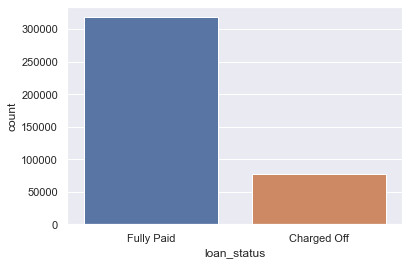

In [2]:
import seaborn as sns

# use countplot to understand 'loan_status' feature
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="loan_status", data=df)

### Task 1.2

In [3]:
# calculate correlation between all continuous features
df.select_dtypes('number').corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


### Task 1.3

<AxesSubplot:>

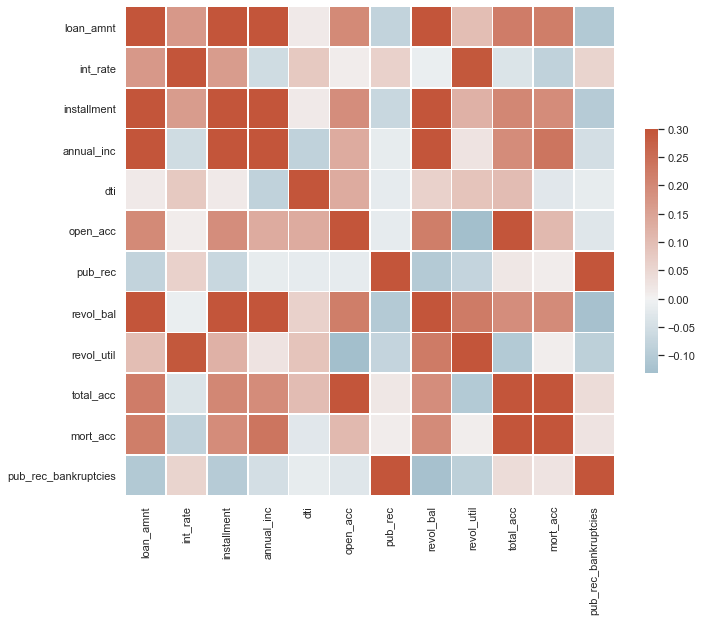

In [4]:
# feature correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

featureCorrelationMatrix = df.select_dtypes('number').corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.subplots(figsize=(11, 9))
sns.heatmap(featureCorrelationMatrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Task 1.4

Yes, there is duplicate information here.
Here 'installment' and 'loan_amnt' have a correlation coefficient of 0.95 which is close to 1.0 - the maximum possible correlation coefficient. This means it is sufficient to consider only one of these features.
There are also other feature pairs with high correlation coefficient,e.g., ('total_acc','open_acc') 0.68 and ('pub_rec_bankruptcies','pub_rec') 0.69.

### Task 1.5

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='loan_status'>

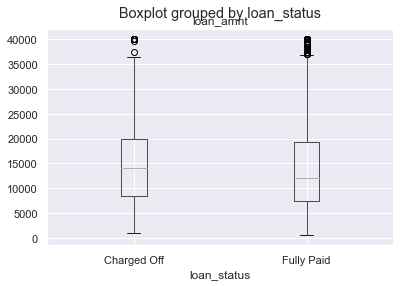

In [5]:
df.boxplot(column=['loan_amnt'], by='loan_status')

- The maximum, minimum, interquartile range are almost the same for both type of loan status.
- The median of Fully Paid loan status type has is lower than that of Charged Off loan status type.
- There are more Fully Paid maximum outliers than that of Charged Off type.

### Task 1.6

In [6]:
df[["loan_amnt","loan_status"]].groupby(['loan_status']).describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               
                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

### Task 1.7

In [7]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [8]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

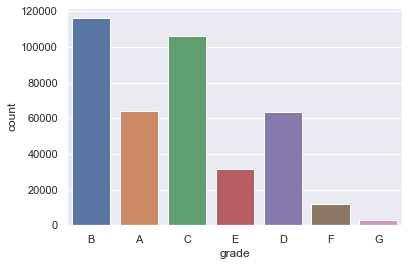

In [9]:
ax = sns.countplot(x="grade", data=df)

- 'sub_grade' contains the same 'grade' information with high granularity 
- so 'grade' can be considered a redundant column and can be droped

In [10]:
# drop 'grade' column
df = df.drop(columns = 'grade')

### Task 1.8

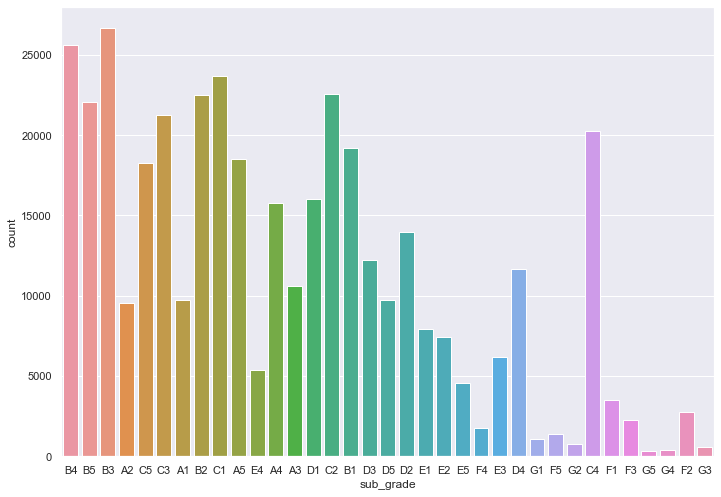

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="sub_grade", data=df)

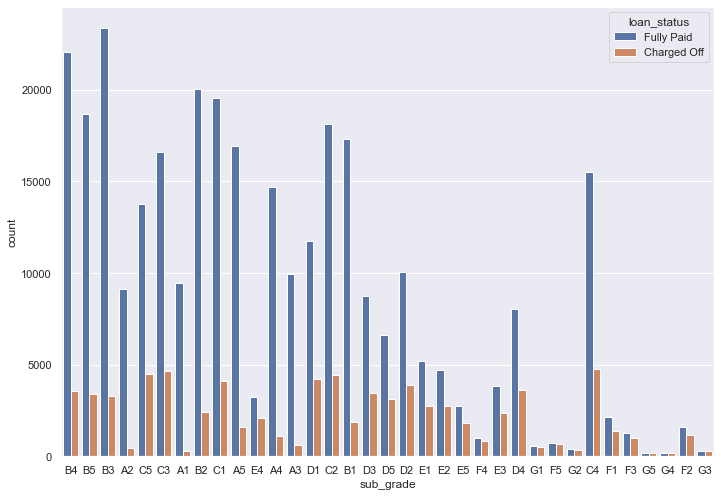

In [12]:
ax = sns.countplot(x="sub_grade", hue="loan_status", data=df)

### Task 1.9

In [13]:
# get count for each type of loan_status for each sub grade type
df_sub = df[['sub_grade','loan_status']].groupby(['sub_grade','loan_status']).size() 
df_sub

sub_grade  loan_status
A1         Charged Off     279
           Fully Paid     9450
A2         Charged Off     461
           Fully Paid     9106
A3         Charged Off     614
                          ... 
G3         Fully Paid      270
G4         Charged Off     168
           Fully Paid      206
G5         Charged Off     159
           Fully Paid      157
Length: 70, dtype: int64

In [14]:
# calculate percentage of Charged Off and Fully Paid for each subgrade from count
df_pcts = df_sub.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_pcts

sub_grade  loan_status
A1         Charged Off     2.867715
           Fully Paid     97.132285
A2         Charged Off     4.818647
           Fully Paid     95.181353
A3         Charged Off     5.805598
                            ...    
G3         Fully Paid     48.913043
G4         Charged Off    44.919786
           Fully Paid     55.080214
G5         Charged Off    50.316456
           Fully Paid     49.683544
Length: 70, dtype: float64

In [15]:
# sort subgrade types based on the percentage of loan status that were Charged Off
df_pcts[:,'Charged Off'].sort_values(ascending=False) 

sub_grade
G3    51.086957
G5    50.316456
F5    48.675734
G2    48.275862
G1    46.124764
F4    45.607163
G4    44.919786
F3    43.613298
F2    42.480116
E5    40.310586
E4    39.302369
F1    38.744344
E3    38.037699
E2    36.737990
E1    34.406972
D5    32.010309
D4    31.131509
D3    28.421828
D2    28.033833
D1    26.380291
C5    24.506687
C4    23.535503
C3    21.841572
C2    19.751993
C1    17.369622
B5    15.503736
B4    13.839303
B3    12.335397
B2    10.851300
B1     9.858200
A5     8.490770
A4     7.023877
A3     5.805598
A2     4.818647
A1     2.867715
dtype: float64

#### G3, G5, F5, G2, G1, F4, G4 are the top 7 subgrades that don't get paid back that often. 

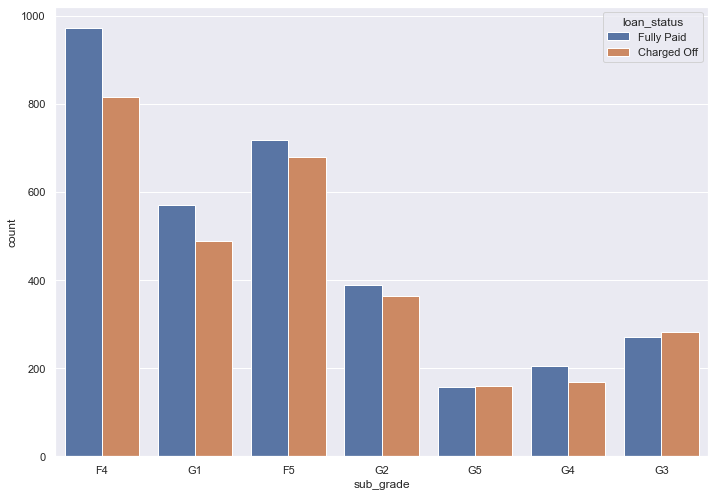

In [16]:
# sub grades countplot for those that don't get paid back that often
ax = sns.countplot(x="sub_grade", hue="loan_status", data=df[df["sub_grade"].isin(['G3','G5','F5','G2','G1','F4','G4'])])

### Task 1.10

In [17]:
# create new column called 'loan_repaid' from 'loan_status'
df['loan_repaid'] = df[['loan_status']].replace({"loan_status":{"Fully Paid": 1, "Charged Off": 0}})
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


### Bonus Task 

In [18]:
# calculate correlation of numeric features to new 'loan_repaid' column
df['loan_repaid'] = df['loan_repaid'].astype('float64')
df_lr = df.corr()['loan_repaid'].to_frame()
df_lr = df_lr.reset_index()
df_lr

,index,loan_repaid
0,loan_amnt,-0.059836
1,int_rate,-0.247758
2,installment,-0.041082
3,annual_inc,0.053432
4,dti,-0.062413
5,open_acc,-0.028012
6,pub_rec,-0.019933
7,revol_bal,0.010892
8,revol_util,-0.082373
9,total_acc,0.017893


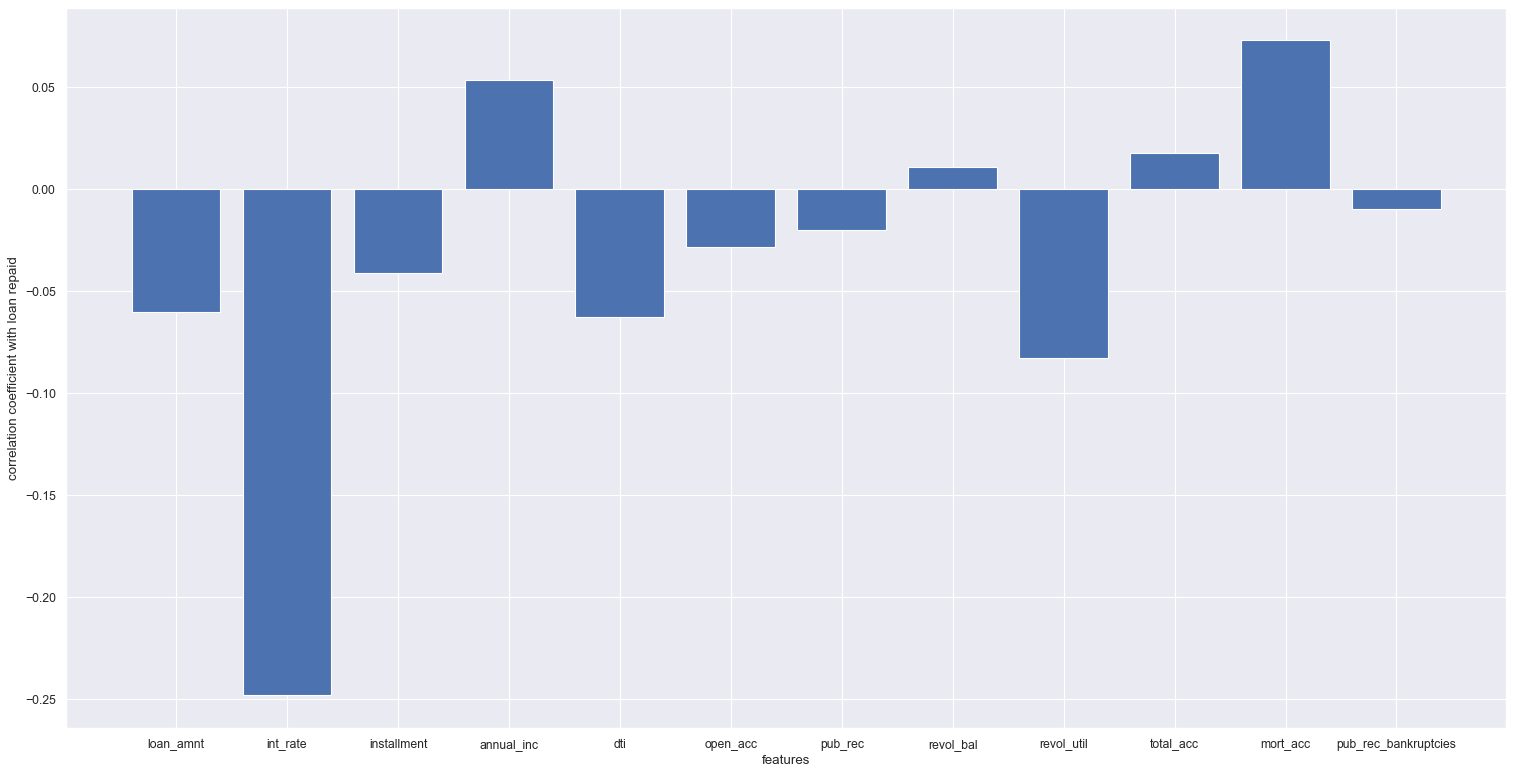

In [19]:
# drop the 'loan_repaid' row itself which has correlation 1.0 with itself
df_lr1 = df_lr.drop([12])
# bar plot showing correaltion
fig = plt.figure(figsize=(18, 9), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('features')
ax.set_ylabel('correlation coefficient with loan repaid')
ax.bar(df_lr1['index'],df_lr1['loan_repaid'])
plt.show()

## Task 2: Data Pre-Processing

In [20]:
# display total count of missing values per column
df_miss = df.isna().sum().to_frame()
df_miss.rename(columns={0: "count_of_missing_values"})
df_miss['missing_percentage'] = df.isna().sum() / len(df) * 100
df_miss

,0,missing_percentage
loan_amnt,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
sub_grade,0,0.000000
emp_title,22927,5.789208
emp_length,18301,4.621115
home_ownership,0,0.000000
annual_inc,0,0.000000
verification_status,0,0.000000


### Task 2.2

- 'emp_title' and 'emp_length' columns have 5.7% and 4.6% of missing data. 
- The percentage of missing data is not significant enough to drop entire columns but the corresponding rows can be filled with the mode of the respective feature columns.

In [21]:
# fill 'emp_title' and 'emp_length' missing values with mode of each feature
df['emp_title'] = df['emp_title'].fillna(df['emp_title'].mode()[0])
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [22]:
# check that all missing values are filled for 'emp_title' and 'emp_length'
df['emp_title'].isna().sum()

0

In [23]:
df['emp_length'].isna().sum()

0

In [24]:
# check cardinality of 'emp_title' to see if it can be converted using dummy variable
df['emp_title'].describe()

count      396030
unique     173105
top       Teacher
freq        27316
Name: emp_title, dtype: object

In [25]:
# drop 'emp_title' as the cardinality of feature is too high to be useful
df = df.drop(columns='emp_title')

### Task 2.3

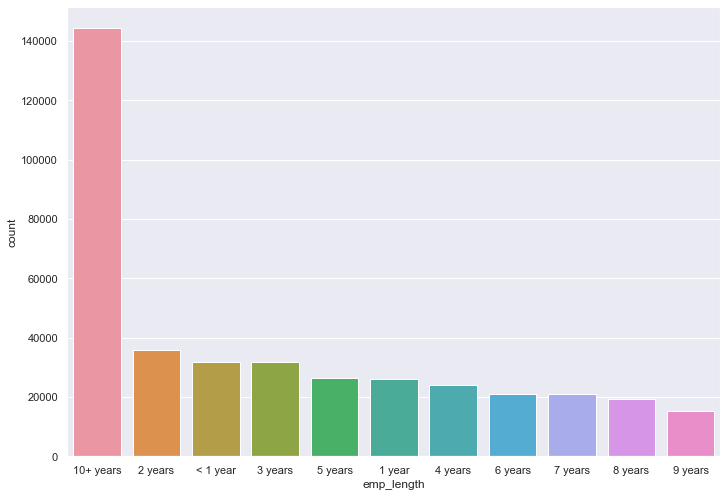

In [26]:
# create ordered count plot of 'emp_length' feature
ax = sns.countplot(x="emp_length", data=df, order = df['emp_length'].value_counts().index)

### Task 2.4

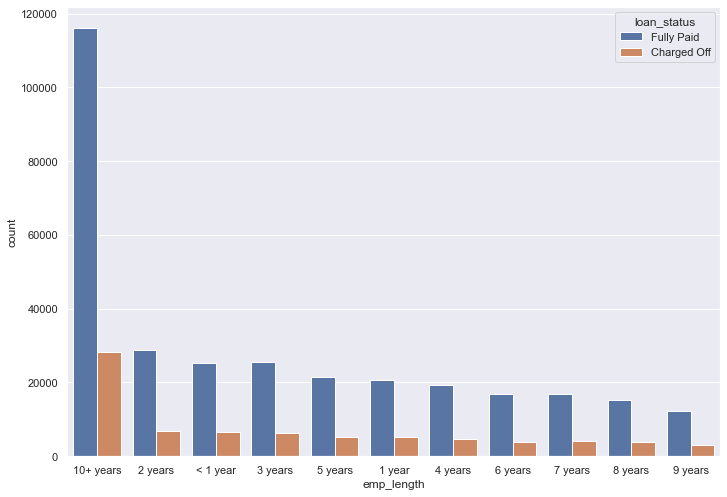

In [27]:
# plot the count plot separating Fully Paid vs Charged Off
ax = sns.countplot(x="emp_length", hue="loan_status", data=df, order = df['emp_length'].value_counts().index)

### Task 2.5

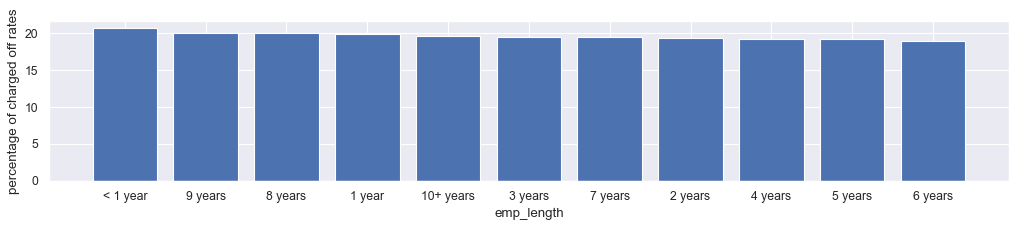

In [28]:
df_emp = df[['emp_length','loan_status']].groupby(['emp_length','loan_status']).size()
df_emp = df_emp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_emp = df_emp[:,'Charged Off'].sort_values(ascending=False).to_frame()
df_emp = df_emp.reset_index()

fig = plt.figure(figsize=(12, 2), dpi=80)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('emp_length')
ax.set_ylabel('percentage of charged off rates')
ax.bar(df_emp['emp_length'],df_emp[0])
plt.show()

### Task 2.6

- The lowest charge off rate is for 10+ years employment length category and that is expected. For people with higher number of employment lengths are expected to be able to pay back the loan.
- The highest charge off rate is for <1 year category.
- After <1 year it is expected 2 year category would follow but we see 9 years. So, there is no linear relationship between employment length and charge off rates.
- It seems employment length is not a good indicator of loan status label and so the feature can be droped.

In [29]:
df = df.drop(columns='emp_length')

### Task 2.7

In [30]:
# get statistics for title column
df['title'].describe()

count                 394275
unique                 48817
top       Debt consolidation
freq                  152472
Name: title, dtype: object

In [31]:
# get statistics for purpose column
df['purpose'].describe()

count                 396030
unique                    14
top       debt_consolidation
freq                  234507
Name: purpose, dtype: object

- 'title' column works as an identifier for the request and 'purpose' categorizes the loan request. 
- 'pupose' can be thought of the primary category and 'title' can be considered as a sub category of 'purpose' column
- There are 48817 unique values for title column and if we consider this categorical feature then the data would suffer from curse of high dimensionality.
- 'title' column contains redundant information and so it can be droped.

In [32]:
# drop 'title' column
df = df.drop(columns=['title'])

### Task 2.8

#### Same question as 2.7 

### Task 2.9

In [33]:
# create value counts for mort_acc column
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [34]:
# percentage of missing values in mort_acc
df['mort_acc'].isna().sum() / len(df['mort_acc']) * 100

9.543468929121532

In [35]:
# calculate statistics for mort_acc
df['mort_acc'].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [36]:
# replace missing values with mean
df["mort_acc"].fillna(df["mort_acc"].mean())

0         0.000000
1         3.000000
2         0.000000
3         0.000000
4         1.000000
            ...   
396025    0.000000
396026    1.000000
396027    0.000000
396028    5.000000
396029    1.813991
Name: mort_acc, Length: 396030, dtype: float64

### Task 2.10

In [37]:
# correlation of mort_acc with other fields
df.select_dtypes('number').corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [38]:
# display the rows where mort_acc values are None
with pd.option_context('display.max_columns', None):
  display(df[df['mort_acc'].isnull()].head())

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
22,4200.0,36 months,6.99,129.67,A3,OWN,24000.0,Not Verified,Jun-2011,Fully Paid,other,4.80,Oct-2006,6.0,0.0,0.0,0.0,7.0,f,INDIVIDUAL,NaN,0.0,"54395 Melissa Walks\nJenniferbury, AL 05113",1.0
25,6000.0,36 months,11.36,197.47,B5,RENT,46680.0,Not Verified,Apr-2010,Charged Off,medical,6.56,Oct-2003,9.0,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\nEast Preston, A...",0.0
32,3000.0,36 months,6.03,91.31,A1,OWN,64000.0,Source Verified,Oct-2011,Fully Paid,credit_card,3.81,Apr-2002,6.0,0.0,4912.0,13.4,18.0,f,INDIVIDUAL,NaN,0.0,"2722 Smith Branch Suite 131\nShaunbury, NH 22690",1.0
41,28000.0,60 months,19.91,312.04,E4,RENT,52000.0,Verified,Dec-2011,Charged Off,debt_consolidation,20.70,Dec-1988,10.0,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690",0.0
62,5000.0,36 months,10.39,118.45,B4,RENT,66000.0,Not Verified,May-2008,Fully Paid,medical,1.56,Dec-2001,12.0,0.0,15807.0,20.0,17.0,f,INDIVIDUAL,NaN,0.0,USS Goodman\nFPO AE 22690,1.0


In [39]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# initialize the simple model for missing data imputation
imp = IterativeImputer(max_iter=10, random_state=0)
# fit the model on the numeric data of the dataframe
imp.fit(df.select_dtypes('number'))
IterativeImputer(random_state=0)
# fill missing 'mort_acc' data using the iterativeimputer
arr = np.round(imp.transform(df.select_dtypes('number')))
# assign new values
df['mort_acc'] = arr[:,10]

In [40]:
# check to see all missing mort_acc has been filled
# there is no output as all rows with missing mort_acc has been filled
with pd.option_context('display.max_columns', None):
  display(df[df['mort_acc'].isnull()].head())

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid


### Task 2.11

In [41]:
# percentage of missing values in 'revol_util'
df['revol_util'].isna().sum() / len(df['revol_util']) * 100

0.06969169002348306

In [42]:
# percentage of missing values in 'pub_rec_bankruptcies'
df['pub_rec_bankruptcies'].isna().sum() / len(df['pub_rec_bankruptcies']) * 100

0.13509077595131683

- Yes, the percentage of missing values for 'revol_util' and 'pub_rec_bankruptcies' are 0.07% and 0.13% respectively
- Both features have continuous data type and so the missing values can be replaced by the mean of the respective feature values

In [43]:
# fill 'revol_util' and 'pub_rec_bankruptcies' missing values with their respective means
df["revol_util"] = df["revol_util"].fillna(df['revol_util'].mean())
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].fillna(df['pub_rec_bankruptcies'].mean())

In [44]:
# check that there are no missing values now
df['revol_util'].isna().sum() / len(df['revol_util']) * 100

0.0

In [45]:
df['pub_rec_bankruptcies'].isna().sum() / len(df['pub_rec_bankruptcies']) * 100

0.0

### Task 2.12

In [46]:
# list columns that are non numeric
df.select_dtypes(include='object').columns.to_list()

['term',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### Task 2.13

In [47]:
# convert 'term' column into a 36 or 60 integer numeric data type
df['term'] = df[['term']].replace({"term":{" 36 months": 36, " 60 months": 60}})

### Task 2.14

- It's better not to drop 'grade' column.
- 'grade' column is highly related to 'sub_grade' column. 'sub_grade' column provides high granularity. But if we encode 'sub_grade' there will be a lot more columns than encoding 'grade' column. 
- Using 'grade' column only will result in a loss of information but as the loss is only in terms of granularity, the loss can be considered insignificant.

In [48]:
#df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   issue_d               396030 non-null  object 
 9   loan_status           396030 non-null  object 
 10  purpose               396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

### Task 2.15 

In [49]:
# convert sub_grade into dummy variables  
df_subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df_subgrade_dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# concatenate with original dataframe
df_concat = pd.concat([df, df_subgrade_dummies], axis=1)
# drop 'sub_grade' column
df_concat = df_concat.drop(columns=['sub_grade'])
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   home_ownership        396030 non-null  object 
 5   annual_inc            396030 non-null  float64
 6   verification_status   396030 non-null  object 
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

### Task 2.16

In [51]:
# convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables
df_ver = pd.get_dummies(df['verification_status'], drop_first=True)
df_app = pd.get_dummies(df['application_type'], drop_first=True)
df_init = pd.get_dummies(df['initial_list_status'], drop_first=True)
df_purpose = pd.get_dummies(df['purpose'], drop_first=True)

# concatenate with original dataframe
df_concat = pd.concat([df_concat, df_ver, df_app, df_init, df_purpose], axis = 1)

# drop the original columns
df_concat = df_concat.drop(columns=['verification_status','application_type','initial_list_status','purpose'])

df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 71 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   home_ownership        396030 non-null  object 
 5   annual_inc            396030 non-null  float64
 6   issue_d               396030 non-null  object 
 7   loan_status           396030 non-null  object 
 8   dti                   396030 non-null  float64
 9   earliest_cr_line      396030 non-null  object 
 10  open_acc              396030 non-null  float64
 11  pub_rec               396030 non-null  float64
 12  revol_bal             396030 non-null  float64
 13  revol_util            396030 non-null  float64
 14  total_acc             396030 non-null  float64
 15  

### Task 2.17

In [52]:
# display count for values of 'home_ownership' column
df['home_ownership'].value_counts().to_frame()

,home_ownership
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


### Task 2.18

In [53]:
# replace NONE and ANY with OTHER
df['home_ownership'] = df[['home_ownership']].replace({"home_ownership":{"NONE": 'OTHER', "ANY": 'OTHER'}})

In [54]:
# convert 'home_ownership' column into dummy variables
df_home = pd.get_dummies(df['home_ownership'], drop_first=True)
# concatenate to the original dataframe
df_concat = pd.concat([df_concat, df_home], axis = 1)
# drop the original 'home_ownership' column
df_concat = df_concat.drop(columns = ['home_ownership'])
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 73 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   annual_inc            396030 non-null  float64
 5   issue_d               396030 non-null  object 
 6   loan_status           396030 non-null  object 
 7   dti                   396030 non-null  float64
 8   earliest_cr_line      396030 non-null  object 
 9   open_acc              396030 non-null  float64
 10  pub_rec               396030 non-null  float64
 11  revol_bal             396030 non-null  float64
 12  revol_util            396030 non-null  float64
 13  total_acc             396030 non-null  float64
 14  mort_acc              396030 non-null  float64
 15  

### Task 2.19

In [55]:
# create a column called 'zip_code' that extracts the zip code from the address column
df_concat['zip_code'] = df_concat['address'].transform(lambda x : int(x.split(' ')[-1]))
df_concat['zip_code'].to_frame()

,zip_code
0,22690
1,5113
2,5113
3,813
4,11650
...,...
396025,30723
396026,5113
396027,70466
396028,29597


### Task 2.20

In [56]:
# make 'zip_code' column into dummy variables 
df_zip = pd.get_dummies(df_concat['zip_code'], drop_first=True)
# concatenate to the original dataframe
df_concat = pd.concat([df_concat, df_zip], axis = 1)
# drop the original 'zip_code' column
df_concat = df_concat.drop(columns=['zip_code'])
# drop the address column
df_concat = df_concat.drop(columns=['address'])
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 81 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   annual_inc            396030 non-null  float64
 5   issue_d               396030 non-null  object 
 6   loan_status           396030 non-null  object 
 7   dti                   396030 non-null  float64
 8   earliest_cr_line      396030 non-null  object 
 9   open_acc              396030 non-null  float64
 10  pub_rec               396030 non-null  float64
 11  revol_bal             396030 non-null  float64
 12  revol_util            396030 non-null  float64
 13  total_acc             396030 non-null  float64
 14  mort_acc              396030 non-null  float64
 15  

### Task 2.21

In [57]:
# extract year from 'earliest_cr_line'
df_concat['earliest_cr_year'] = df_concat['earliest_cr_line'].transform(lambda x : int(x.split('-')[-1]))
# view transformed column
df_concat['earliest_cr_year'].to_frame()


,earliest_cr_year
0,1990
1,2004
2,2007
3,2006
4,1999
...,...
396025,2004
396026,2006
396027,1997
396028,1990


In [58]:
# drop 'earliest_cr_line' column
df_concat = df_concat.drop(columns=['earliest_cr_line'])
# view transformed dataframe
#df_concat.info()

In [59]:
df_concat = df_concat.drop(columns=['issue_d'])
# drop 'loan_status' column
df_concat = df_concat.drop(columns=['loan_status'])

# view transformed dataframe
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   annual_inc            396030 non-null  float64
 5   dti                   396030 non-null  float64
 6   open_acc              396030 non-null  float64
 7   pub_rec               396030 non-null  float64
 8   revol_bal             396030 non-null  float64
 9   revol_util            396030 non-null  float64
 10  total_acc             396030 non-null  float64
 11  mort_acc              396030 non-null  float64
 12  pub_rec_bankruptcies  396030 non-null  float64
 13  loan_repaid           396030 non-null  float64
 14  A2                    396030 non-null  uint8  
 15  

## TASK 3: Train Test Split


### Task 3.1

In [60]:
# set X and y variables to the values of the features and label
X = df_concat.drop('loan_repaid',axis=1)
y = df_concat['loan_repaid']

## TASK 4: Grabbing a Sample for Training Time

### Task 4.1

In [61]:
from sklearn.model_selection import train_test_split

# perform a train/test split with test_size=0.2 and a random_state of 101
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### Task 4.2

In [62]:
# use a MinMaxScaler to normalize the feature data X_train and X_test
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(316824, 78)

In [63]:
X_test.shape

(79206, 78)

### TASK 5: Creating the Model

### Task 5.1

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [72]:
model = Sequential()

model.add(Dense(79,activation='relu'))
model.add(Dropout(0.2, input_shape=(79,)))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='mse')

### Task 5.2

In [73]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=25)

Epoch 1/25
1238/1238 [==============================] - 1s 881us/step - loss: 0.0957 - val_loss: 0.0837
Epoch 2/25
1238/1238 [==============================] - 1s 798us/step - loss: 0.0843 - val_loss: 0.0829
Epoch 3/25
1238/1238 [==============================] - 1s 807us/step - loss: 0.0836 - val_loss: 0.0827
Epoch 4/25
1238/1238 [==============================] - 1s 801us/step - loss: 0.0831 - val_loss: 0.0825
Epoch 5/25
1238/1238 [==============================] - 1s 804us/step - loss: 0.0829 - val_loss: 0.0824
Epoch 6/25
1238/1238 [==============================] - 1s 795us/step - loss: 0.0827 - val_loss: 0.0824
Epoch 7/25
1238/1238 [==============================] - 1s 800us/step - loss: 0.0825 - val_loss: 0.0825
Epoch 8/25
1238/1238 [==============================] - 1s 801us/step - loss: 0.0825 - val_loss: 0.0820
Epoch 9/25
1238/1238 [==============================] - 1s 797us/step - loss: 0.0823 - val_loss: 0.0822
Epoch 10/25
1238/1238 [==============================] - 1s 799u

### Task 5.3

In [74]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


## TASK 6: Evaluating Model Performance

### Task 6.1

<AxesSubplot:>

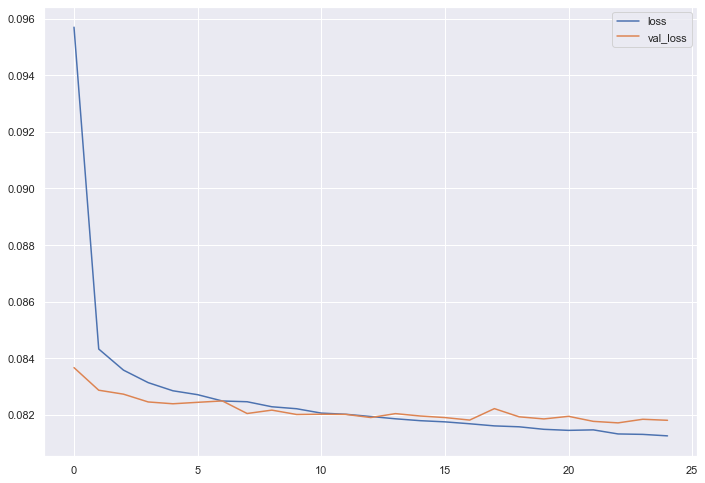

In [75]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Task 6.2

In [76]:
# get predictions on test set
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.where(predictions > 0.5, 1.0, 0.0)
# display confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 7218  8275]
 [  509 63204]]


In [77]:
# display classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.47      0.62     15493
         1.0       0.88      0.99      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.91      0.73      0.78     79206
weighted avg       0.89      0.89      0.87     79206



### Task 6.3

In [78]:
import random
random.seed(101)
random_ind = random.randint(0,len(df_concat))
new_customer = df_concat.drop('loan_repaid',axis=1).iloc[random_ind]

new_customer_loan = model.predict(new_customer.values.reshape(1,78))
new_customer_loan

array([[1.]], dtype=float32)

- model predicts the person is going to pay back their loan

### Task 6.4

In [81]:
df_concat['loan_repaid'].iloc[random_ind]

1.0

- It was checked that the person actually did pay back their loan